# Use iRF to find marker genes 

In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
f = np.load('../code/reza/nmf_result_ncomp_18.npz')
#print(np.sum(f['data']))
PPs = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
coefs = f['D']

In [5]:
D_cube = PPs.reshape([18] + list(original_shape[1:])) 

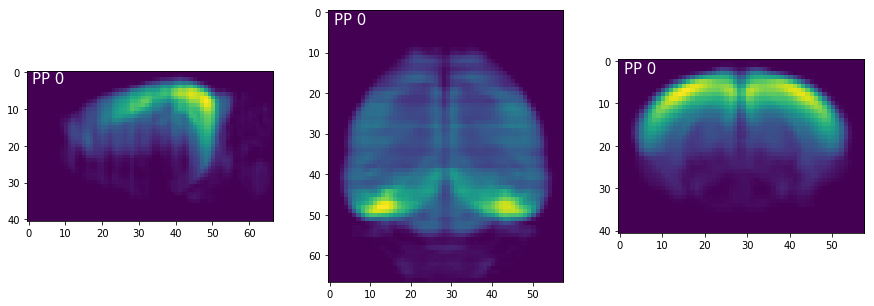

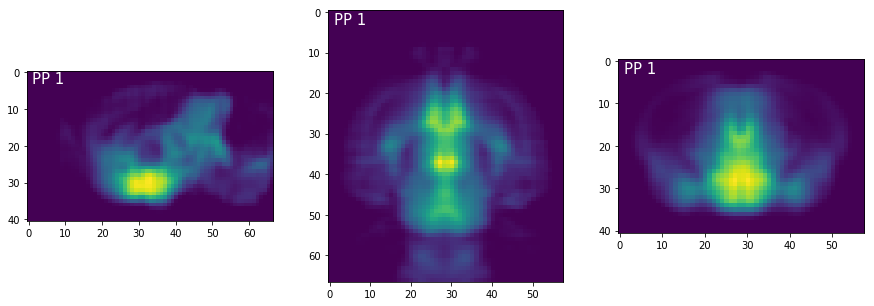

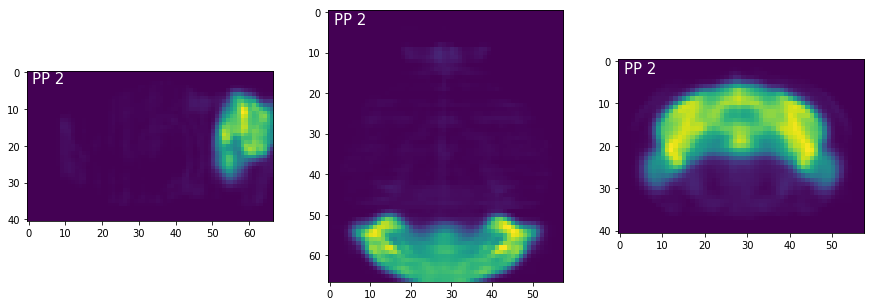

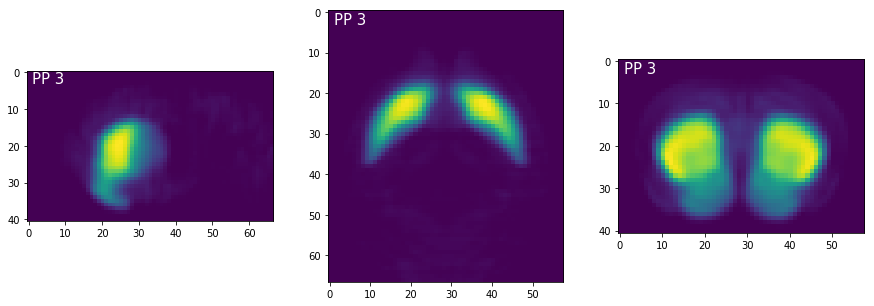

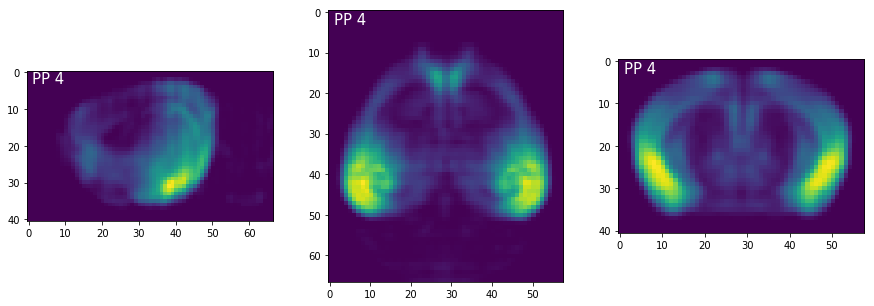

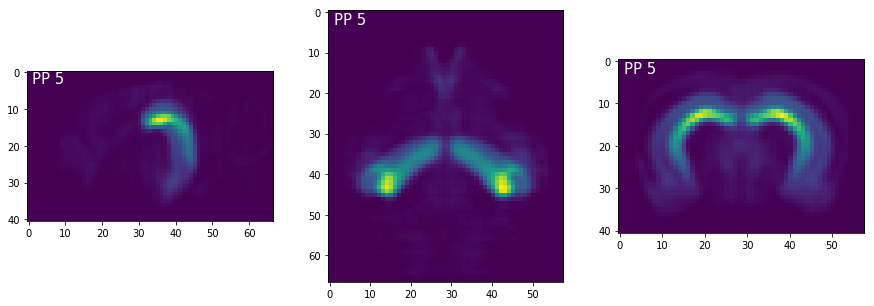

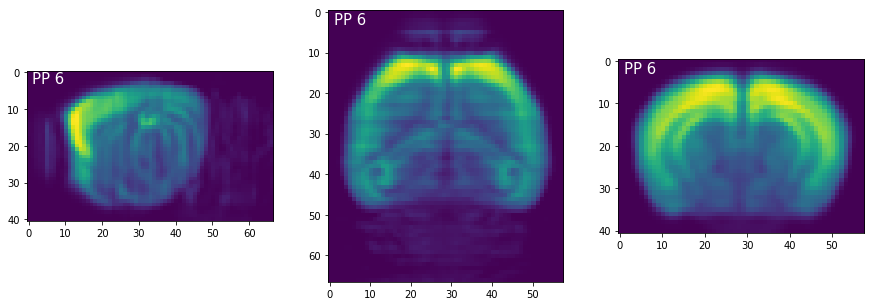

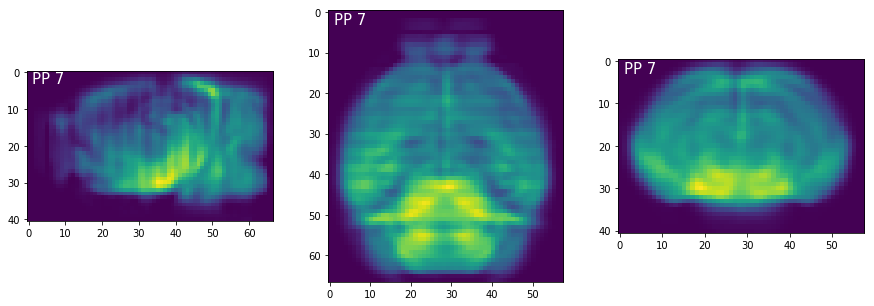

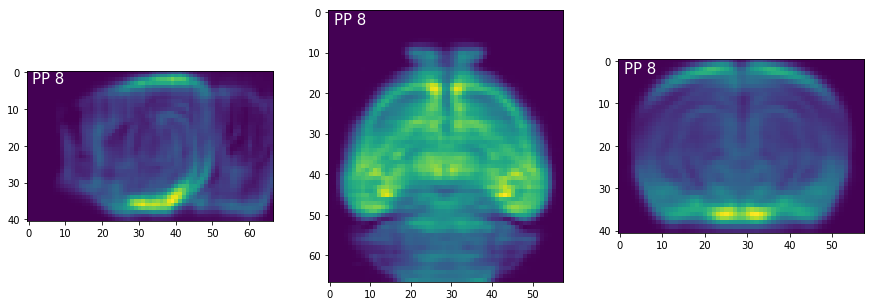

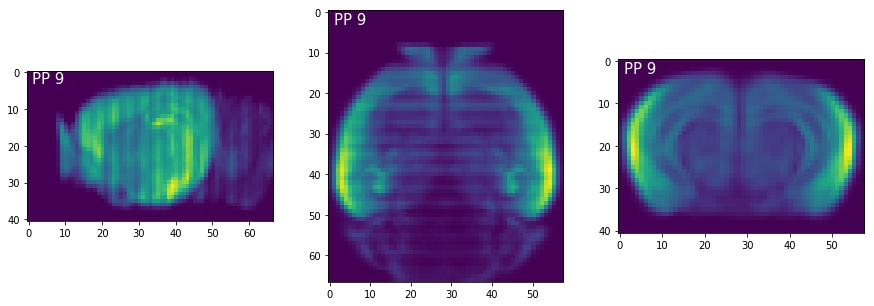

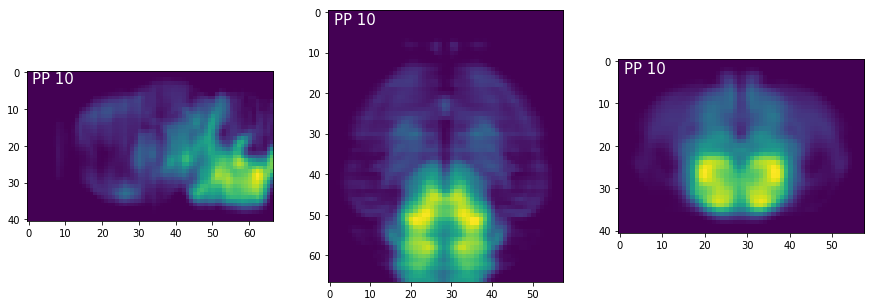

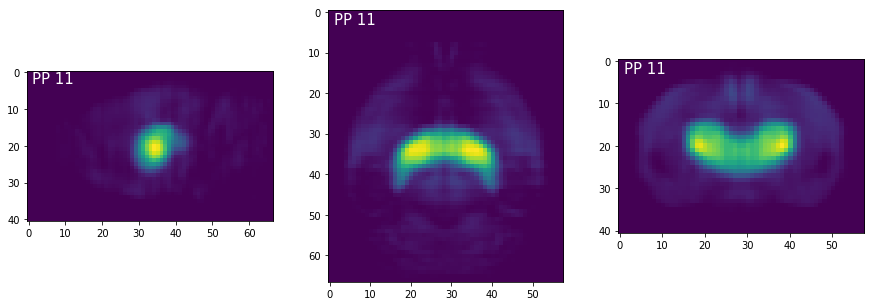

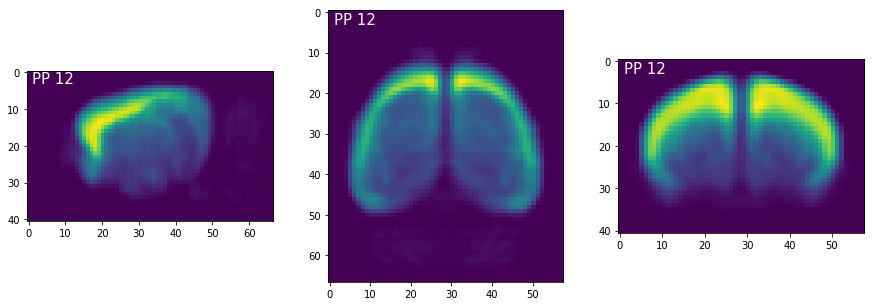

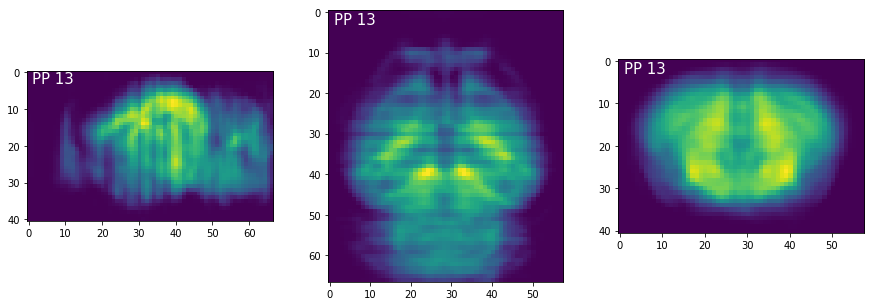

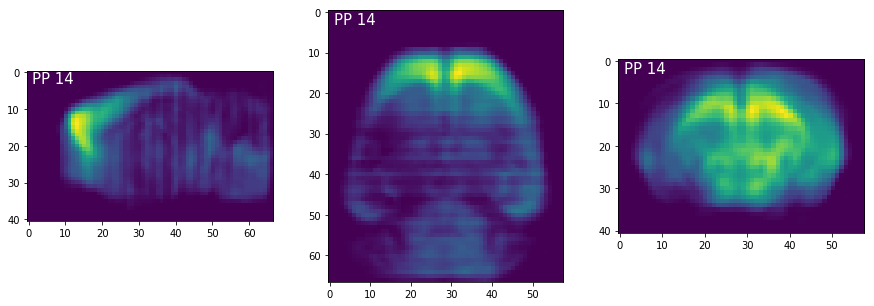

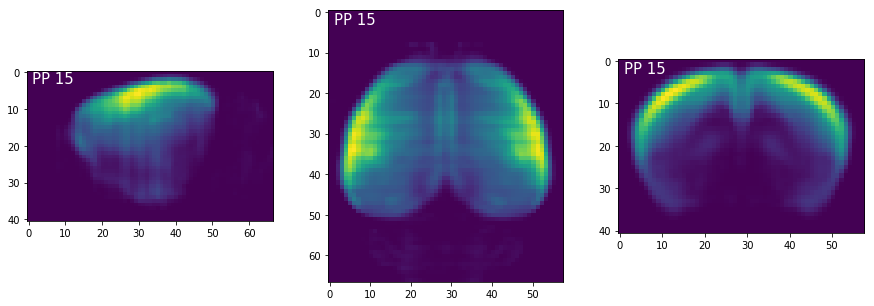

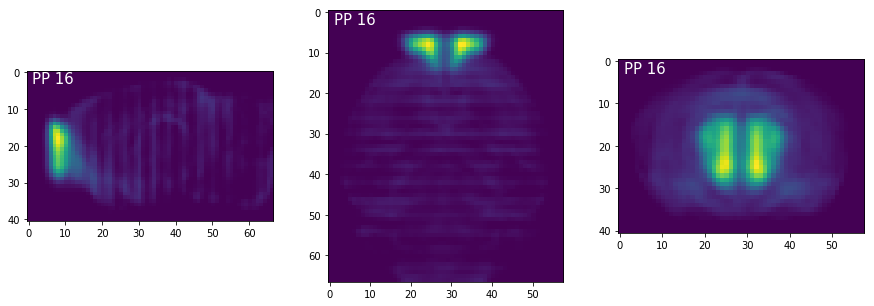

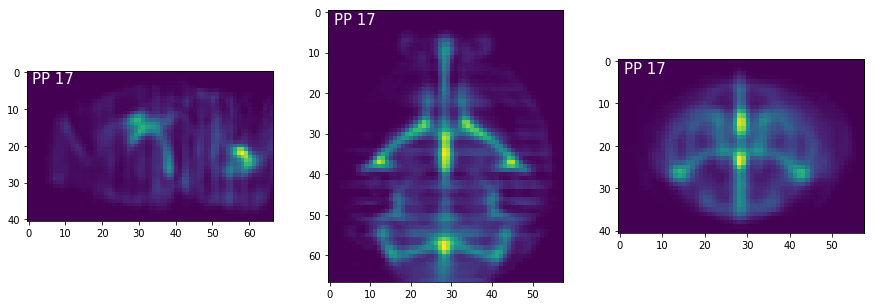

In [8]:
D_shrink = np.maximum(D_cube - 0, 0)
for i in range(18):
    _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
    a.imshow(np.mean(D_shrink[i, :, :, :], 2).T)
    b.imshow(np.mean(D_shrink[i, :, :, :], 1))
    c.imshow(np.mean(D_shrink[i, :, :, :], 0))
    a.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)
    b.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)
    c.text(1, 3, 'PP {}'.format(i), color='w', fontsize=15)

### goal of the problem

- Use X to predict loadings of each PP

In [10]:
X = X_guess.T
X.shape

(159326, 4345)

In [13]:
y = PPs.T
y.shape

(159326, 18)

- Classification problem setup

In [14]:
label = 1 * (y > 1e-4)